# Creating model that predicts

## Importing Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, MinMaxScaler
from sklearn.compose import make_column_transformer

from pathlib import Path
import warnings

In [2]:
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", None)
pd.set_option("display.width", 1000)

## Loading Model

In [3]:
# You can get data from: https://www.kaggle.com/datasets/sehriyarmemmedli/binaaz-sale-project

full_path = Path("../data")
path = full_path / "house_sale.csv"
data = pd.read_csv(path);

## Overlooking

In [4]:
data.head()

,id_x,rel_url,estate_rel_url_x,datetime_scrape_x,price,currency_x,location,attributes,city_when,city,day_x,hour_x,repair,vip,featured,products_label,bill_of_sale,mortgage,img_url,id_y,estate_id,estate_rel_url_y,datetime_scrape_y,description,unit_price,total_price,currency_y,owner_name,owner_title,shop_name,shop_title,address,lat,lng,updated,views,day_y,hour_y,estate_details_id_x,Binanın növü,Kateqoriya,Mərtəbə,Otaq sayı,Sahə,Torpaq sahəsi,Təmir,Çıxarış,İpoteka,estate_details_id_y,estate_rel_url,extra_info
0,5df36281-6dc6-4d5d-89a7-5fcfa86f7608,/alqi-satqi?page=174,/items/4521724,2024-10-05 22:07:37.60613+00,499999.0,AZN,Səbail r.,"4 otaqlı, 145 m², 7/9 mərtəbə","Bakı, dünən 23:52",bakı,05.10.2024,23:52,Təmirli,vipped,featured,NaN,Çıxarış var,NaN,https://bina.azstatic.com/uploads/f460x345/202...,92e82ea2-e1f3-4c2d-a284-151efd99281e,5df36281-6dc6-4d5d-89a7-5fcfa86f7608,/items/4521724,2024-10-05 22:14:10.089116+00,"Səbail Rayonu, İzzət Nəbiyev küçəsi, Fəxri Xiy...",3 450 AZN/m²,499999.0,AZN,Kamran,mülkiyyətçi,NaN,NaN,İzzət Nəbiyev küç.,40.358817,49.824092,yeniləndi: dünən 23:52,1155,05.10.2024,23:52,92e82ea2-e1f3-4c2d-a284-151efd99281e,NaN,Köhnə tikili,7 / 9,4.0,145 m²,NaN,var,var,NaN,92e82ea2-e1f3-4c2d-a284-151efd99281e,/items/4521724,Şəhidlər xiyabanı * Dağüstü parkı * Səbail r.
1,883e20f0-8872-49a5-8b4b-63b8301b5f8f,/alqi-satqi?page=250,/items/4669294,2024-10-05 22:07:37.60613+00,77000.0,AZN,Biləcəri q.,"4 otaqlı, 90 m²","Bakı, dünən 23:56",bakı,05.10.2024,23:56,Təmirli,NaN,NaN,NaN,NaN,NaN,https://bina.azstatic.com/uploads/f460x345/202...,505eaf81-6bc8-4094-9b00-aa82066548ee,883e20f0-8872-49a5-8b4b-63b8301b5f8f,/items/4669294,2024-10-05 22:14:10.089116+00,"Biləcəridə Abidəyə yaxin 91,92,202 saylı marşr...",NaN,77000.0,AZN,Dasinmaz Emlak,vasitəçi (agent),NaN,NaN,Biləcəri qəs.,40.420897,49.807035,yeniləndi: 04 oktyabr 2024,218,04.10.2024,NaN,505eaf81-6bc8-4094-9b00-aa82066548ee,NaN,Həyət evi/Bağ evi,NaN,4.0,90 m²,1.3 sot,var,yoxdur,NaN,505eaf81-6bc8-4094-9b00-aa82066548ee,/items/4669294,Binəqədi r.* Biləcəri q.
2,55c36fb1-a3af-476e-ba17-a81f6795be8d,/alqi-satqi?page=250,/items/4669293,2024-10-05 22:07:37.60613+00,92000.0,AZN,İnşaatçılar m.,"3 otaqlı, 60 m²","Bakı, dünən 23:55",bakı,05.10.2024,23:55,Təmirli,NaN,NaN,NaN,Çıxarış var,NaN,https://bina.azstatic.com/uploads/f460x345/202...,fa63b201-999d-43b5-a61a-778d9d79a6c6,55c36fb1-a3af-476e-ba17-a81f6795be8d,/items/4669293,2024-10-05 22:14:10.089116+00,Salam əleykum. \nİnşaatçılar metrosuna yaxın m...,NaN,92000.0,AZN,Məhəmməd,vasitəçi (agent),NaN,NaN,Mirzə Cabbar Məmmədzadə küç.,40.390293,49.802656,yeniləndi: 04 oktyabr 2024,190,04.10.2024,NaN,fa63b201-999d-43b5-a61a-778d9d79a6c6,NaN,Həyət evi/Bağ evi,NaN,3.0,60 m²,0.1 sot,var,var,NaN,fa63b201-999d-43b5-a61a-778d9d79a6c6,/items/4669293,İnşaatçılar m.* Yasamal r.
3,acf1aa8d-a46a-40f5-b6f2-f7a449569337,/alqi-satqi?page=250,/items/4647811,2024-10-05 22:07:37.60613+00,95000.0,AZN,Qaraçuxur q.,130 m²,"Bakı, dünən 23:55",bakı,05.10.2024,23:55,Təmirli,vipped,featured,NaN,Çıxarış var,İpoteka var,https://bina.azstatic.com/uploads/f460x345/202...,5db56980-05cc-4925-b55b-f58fb3f4d2b6,acf1aa8d-a46a-40f5-b6f2-f7a449569337,/items/4647811,2024-10-05 22:14:10.089116+00,Barter maraqlidir üstünlük maşina verilir\nHər...,NaN,95000.0,AZN,Elçin,mülkiyyətçi,NaN,NaN,Qaraçuxur qəs.,40.393614,49.981553,yeniləndi: 04 oktyabr 2024,1314,04.10.2024,NaN,5db56980-05cc-4925-b55b-f58fb3f4d2b6,NaN,Obyekt,NaN,NaN,130 m²,NaN,var,var,var,5db56980-05cc-4925-b55b-f58fb3f4d2b6,/items/4647811,Suraxanı r.* Qaraçuxur q.
4,22d840df-9283-4112-bc71-7432511fc776,/alqi-satqi?page=250,/items/4638863,2024-10-05 22:07:37.60613+00,220000.0,AZN,Əhmədli m.,"3 otaqlı, 100 m², 15/16 mərtəbə","Bakı, dünən 23:52",bakı,05.10.2024,23:52,Təmirli,NaN,NaN,Agentlik,Çıxarış var,NaN,https://bina.azstatic.com/uploads/f460x345/202...,d71cf9a9-86dd-4162-b540-6252a8659a09,22d840df-9283-4112-bc71-7432511fc776,/items/4638863,2024-10-05 22:14:10.089116+00,Əhmədli qəs. Qaçaq Nəbi küçəsi 3 otaga duzelm...

In [5]:
data.describe(include="all")

,id_x,rel_url,estate_rel_url_x,datetime_scrape_x,price,currency_x,location,attributes,city_when,city,day_x,hour_x,repair,vip,featured,products_label,bill_of_sale,mortgage,img_url,id_y,estate_id,estate_rel_url_y,datetime_scrape_y,description,unit_price,total_price,currency_y,owner_name,owner_title,shop_name,shop_title,address,lat,lng,updated,views,day_y,hour_y,estate_details_id_x,Binanın növü,Kateqoriya,Mərtəbə,Otaq sayı,Sahə,Torpaq sahəsi,Təmir,Çıxarış,İpoteka,estate_details_id_y,estate_rel_url,extra_info
count,100775,100775,100775,100775,1.007750e+05,100775,100775,100775,100775,100775,100775,100775,81612,8596,3149,72630,79565,32939,100775,100775,100775,100775,100775,100510,75996,1.007750e+05,100775,100118,100118,72018,72018,100775,100775.000000,100775.000000,100775,100775.000000,100775,15631,100775,154,100775,75996,91363.000000,100775,15571,94774,100775,32939,100775,100775,100775
unique,100775,411,64454,36,NaN,1,142,21347,1504,8,36,1226,1,1,1,2,1,1,64990,100775,100775,64454,152,63385,814,NaN,1,5448,2,316,1,16716,NaN,NaN,1145,NaN,38,1028,100775,3,7,392,NaN,1804,188,2,2,1,100775,64454,3000
top,e85db6c0-141d-44a3-a078-dcb4a4641091,/alqi-satqi?page=267,/items/4582627,2024-10-09 04:58:40.151251+00,NaN,AZN,Nəriman Nərimanov m.,"4 otaqlı, 160 m²","Bakı, dünən 12:26",bakı,08.10.2024,12:26,Təmirli,vipped,featured,Agentlik,Çıxarış var,İpoteka var,https://bina.azstatic.com/uploads/f460x345/202...,1af4df10-8bfe-4d29-8964-9d8533cd3883,e85db6c0-141d-44a3-a078-dcb4a4641091,/items/4582627,2024-10-09 05:02:29.349209+00,"""Knightsbridge Residence"" premium yaşayış komp...",2 500 AZN/m²,NaN,AZN,Elan sahibi,vasitəçi (agent),Real Əmlak Yeni Yasamal,Daşınmaz əmlak agentliyi,Mərdəkan qəsəbəsi,NaN,NaN,yeniləndi: 15 oktyabr 2024,NaN,08.10.2024,14:48,1af4df10-8bfe-4d29-8964-9d8533cd3883,Ev / Mənzil,Yeni tikili,5 / 5,NaN,100 m²,3 sot,var,var,var,1af4df10-8bfe-4d29-8964-9d8533cd3883,/items/4582627,Xəzər r.* Mərdəkan q.
freq,1,691,17,5322,NaN,100775,5390,593,218,100436,5322,218,81612,8596,3149,71981,79565,32939,13,1,1,17,5312,56,1192,NaN,100775,1618,89733,2482,72018,1372,NaN,NaN,3809,NaN,8490,54,1,85,57897,1989,NaN,3488,1759,81612,79565,32939,1,17,4825
mean,NaN,NaN,NaN,NaN,3.423557e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.423553e+05,NaN,NaN,NaN,NaN,NaN,NaN,40.410846,49.886371,NaN,700.065185,NaN,NaN,NaN,NaN,NaN,NaN,3.133468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,2.042627e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.042627e+06,NaN,NaN,NaN,NaN,NaN,NaN,0.083193,0.265008,NaN,1680.672574,NaN,NaN,NaN,NaN,NaN,NaN,1.372981,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,1.100000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.100000e+01,NaN,NaN,NaN,NaN,NaN,NaN,32.689217,12.591688,NaN,23.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,1.450000e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.450000e+05,NaN,NaN,NaN,NaN,NaN,NaN,40.381900,49.816470,NaN,99.000000,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,2.180000e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.180000e+05,NaN,NaN,NaN,NaN,NaN,NaN,40.397219,49.852867,NaN,254.000000,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,3.380000e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.380000e+05,NaN,NaN,NaN,NaN,NaN,NaN,40.420578,49.948995,NaN,680.000000,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Droping some values

In [6]:
df = data
df = df.drop_duplicates(subset=["estate_rel_url_x"], keep="last")

In [7]:
df = df[["price", "location", "city","address", "lat", "lng", "İpoteka", "Təmir","Kateqoriya", "Mərtəbə", "Otaq sayı", "Sahə", "Torpaq sahəsi", "Çıxarış"]]

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64454 entries, 1 to 100774
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          64454 non-null  float64
 1   location       64454 non-null  object 
 2   city           64454 non-null  object 
 3   address        64454 non-null  object 
 4   lat            64454 non-null  float64
 5   lng            64454 non-null  float64
 6   İpoteka        21056 non-null  object 
 7   Təmir          60462 non-null  object 
 8   Kateqoriya     64454 non-null  object 
 9   Mərtəbə        48820 non-null  object 
 10  Otaq sayı      58360 non-null  float64
 11  Sahə           64454 non-null  object 
 12  Torpaq sahəsi  9632 non-null   object 
 13  Çıxarış        64454 non-null  object 
dtypes: float64(4), object(10)
memory usage: 7.4+ MB


In [9]:
[(item,df[item].isna().sum()) for item in df.columns if df[item].isna().sum() != 0]

[('İpoteka', np.int64(43398)),
 ('Təmir', np.int64(3992)),
 ('Mərtəbə', np.int64(15634)),
 ('Otaq sayı', np.int64(6094)),
 ('Torpaq sahəsi', np.int64(54822))]

In [ ]:
# full_address = df["city"].str.cat([df["location"], df["address"]], sep=", ")
# df["full_address"] = pd.DataFrame(full_address, index=df["city"].index)

In [11]:
wrong_cords = df[(df["lat"] <= 32.689217) &(df["lng"] <= 12.591688)].index
df = df.drop(wrong_cords)

In [12]:
df["İpoteka"] = df["İpoteka"].fillna("yox")

In [13]:
df.loc[(df["Təmir"].isna()) & (df["Kateqoriya"].isin(["Həyət evi/Bağ evi", "Obyekt", "Torpaq", "Qaraj", "Ofis"])), "Təmir"] = df["Təmir"].fillna("Bilinmir")

df.loc[(df["Təmir"].isna()) & (df["Kateqoriya"].isin(["Yeni tikili"])), "Təmir"] = df["Təmir"].fillna("var")

df.loc[(df["Təmir"].isna()) & (df["Kateqoriya"].isin(["Köhnə tikili"])), "Təmir"] = df["Təmir"].fillna("yoxdur")

In [14]:
df.loc[(df["Mərtəbə"].isna()) & (df["Kateqoriya"].isin(["Həyət evi/Bağ evi", "Obyekt", "Ofis", "Qaraj"])), "Mərtəbə"] = df["Mərtəbə"].fillna("1")

df.loc[(df["Mərtəbə"].isna()) & (df["Kateqoriya"].isin(["Torpaq"])), "Mərtəbə"] = df["Mərtəbə"].fillna("0")

df["Mərtəbə"] = df["Mərtəbə"].str.split("/", expand=True)[0]
df["Mərtəbə"] = df["Mərtəbə"].astype(int)

In [15]:
sahe = df.loc[df["Torpaq sahəsi"].isna() & df["Kateqoriya"].isin(["Torpaq"]), "Sahə"]

df.loc[df["Torpaq sahəsi"].isna() & df["Kateqoriya"].isin(["Torpaq"]), "Torpaq sahəsi"] = sahe

df.loc[df["Torpaq sahəsi"].isna() & ~df["Kateqoriya"].isin(["Torpaq"]), "Torpaq sahəsi"] = df["Torpaq sahəsi"].fillna("0")

df["Torpaq sahəsi"] = df["Torpaq sahəsi"].str.split(" ", expand=True)[0]

In [16]:
median_room_num = df.loc[(~df["Otaq sayı"].isna()) & (df["Kateqoriya"] == "Həyət evi/Bağ evi"), "Otaq sayı"].median()

df.loc[(df["Otaq sayı"].isna()) & (df["Kateqoriya"] == "Həyət evi/Bağ evi"), "Otaq sayı"] = df["Otaq sayı"].fillna(median_room_num)

df.loc[(df["Otaq sayı"].isna()) & ~(df["Kateqoriya"] == "Həyət evi/Bağ evi"), "Otaq sayı"] = df["Otaq sayı"].fillna(0)

In [17]:
df["Sahə"] = df["Sahə"].str.split(" ", expand=True)[0].astype(float)

In [18]:
df

,price,location,city,address,lat,lng,İpoteka,Təmir,Kateqoriya,Mərtəbə,Otaq sayı,Sahə,Torpaq sahəsi,Çıxarış,full_address
1,77000.0,Biləcəri q.,bakı,Biləcəri qəs.,40.420897,49.807035,yox,var,Həyət evi/Bağ evi,1,4.0,90.0,1.3,yoxdur,"bakı, Biləcəri q., Biləcəri qəs."
2,92000.0,İnşaatçılar m.,bakı,Mirzə Cabbar Məmmədzadə küç.,40.390293,49.802656,yox,var,Həyət evi/Bağ evi,1,3.0,60.0,0.1,var,"bakı, İnşaatçılar m., Mirzə Cabbar Məmmədzadə ..."
4,220000.0,Əhmədli m.,bakı,Qaçaq Nəbi küç.,40.390550,49.957675,yox,var,Yeni tikili,15,3.0,100.0,0,var,"bakı, Əhmədli m., Qaçaq Nəbi küç."
5,650000.0,Sahil m.,bakı,Nizami küçəsi.,40.372458,49.838651,yox,var,Köhnə tikili,3,4.0,130.0,0,var,"bakı, Sahil m., Nizami küçəsi."
8,3000000.0,Nizami m.,bakı,"Məhəmməd Naxçıvani küç., 14.",40.383231,49.826150,yox,var,Obyekt,1,0.0,485.0,0,var,"bakı, Nizami m., Məhəmməd Naxçıvani küç., 14."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100770,170000.0,Binəqədi q.,bakı,Binəqədi şossesi donge 1,40.449401,49.774129,yox,var,Həyət evi/Bağ evi,1,6.0,250.0,3.5,yoxdur,"bakı, Binəqədi q., Binəqədi şossesi donge 1"
100771,520000.0,Mərdəkan q.,bakı,Güney Azərbaycan küçəsi 7,40.491947,50.169690,var,var,Həyət evi/Bağ evi,1,4.0,220.0,11,var,"bakı, Mərdəkan q., Güney Azərbaycan küçəsi 7"
100772,650000.0,Mərdəkan q.,bakı,Əliheydər Qarayev küçəsi 10,40.486308,50.167252,var,var,Həyət evi/Bağ evi,1,5.0,350.0,7,var,"bakı, Mərdəkan q., Əliheydər Qarayev küçəsi 10"
100773,310000.0,20 Yanvar m.,bakı,Moskva prospekti,40.412761,49.800789,var,var,Yeni tikili,4,3.0,130.0,0,var,"bakı, 20 Yanvar m., Moskva prospekti"


## Showing correlations

array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'lat'}>],
       [<Axes: title={'center': 'lng'}>,
        <Axes: title={'center': 'Mərtəbə'}>],
       [<Axes: title={'center': 'Otaq sayı'}>,
        <Axes: title={'center': 'Sahə'}>]], dtype=object)

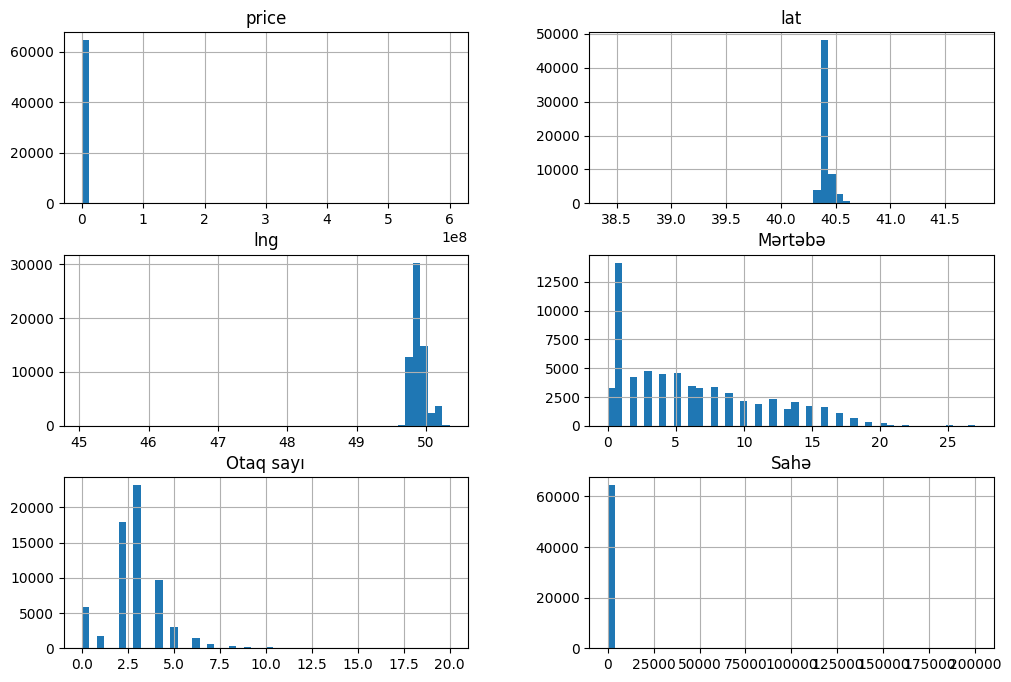

In [48]:
df.hist(bins=50, figsize=(12, 8))

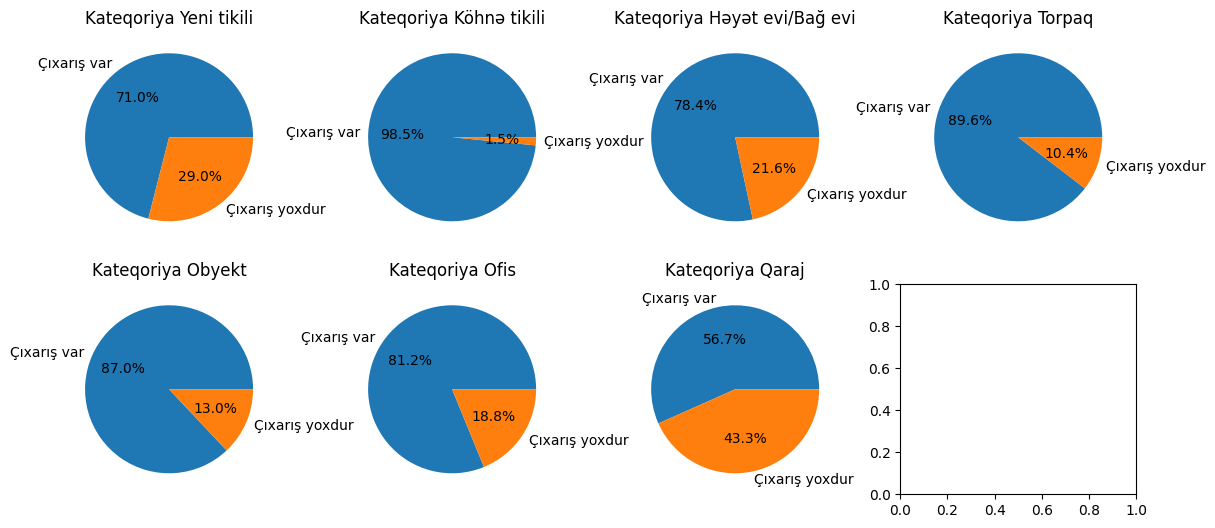

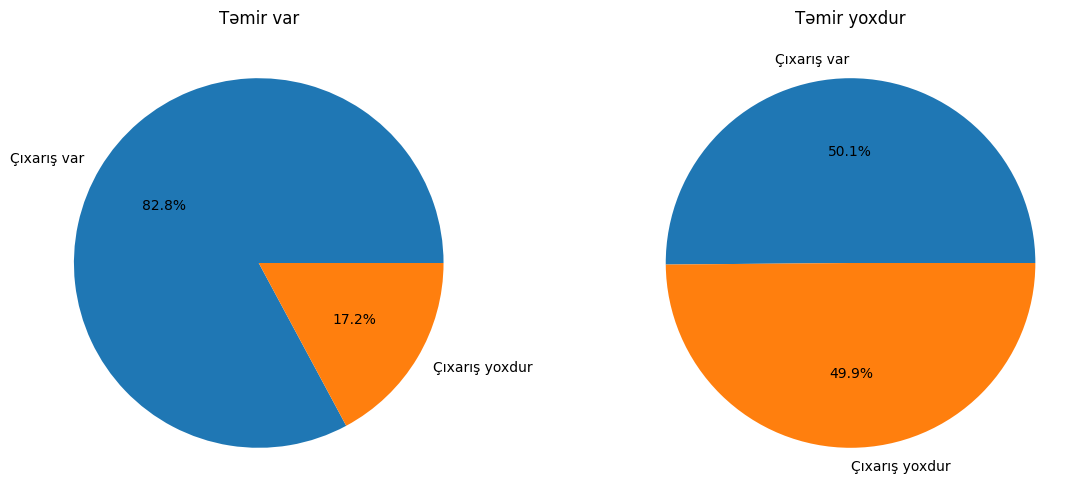

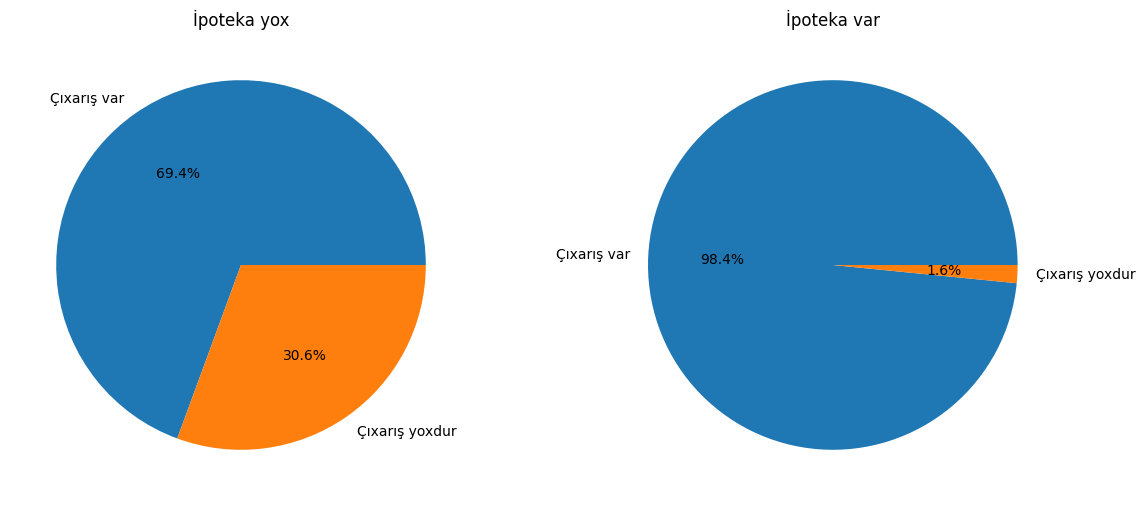

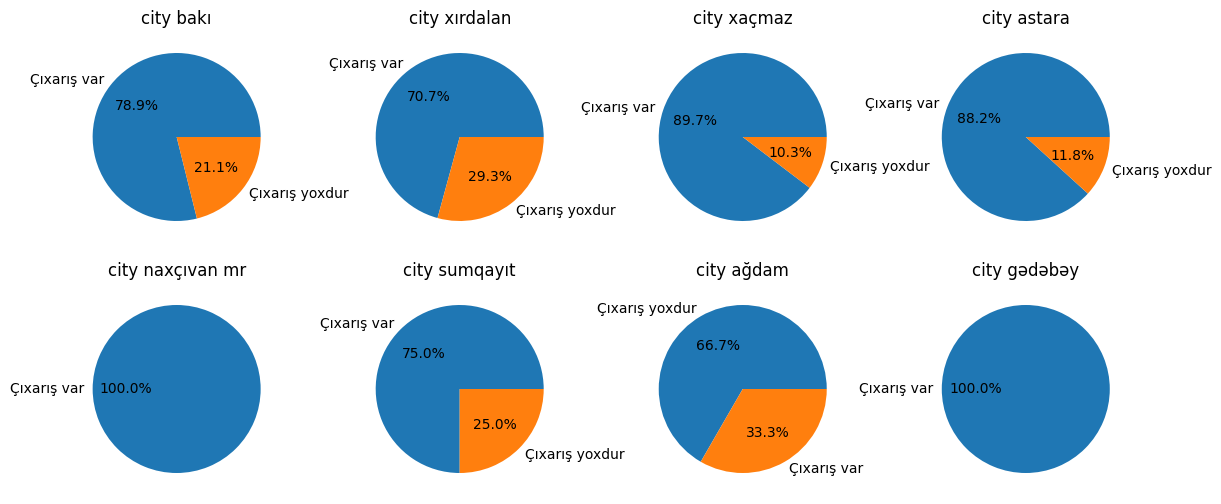

In [33]:
def creat_pie_plot(category=""):
    len_categoreis = len(df[category].value_counts().index)
    n_cols_categorie = round(len_categoreis / 2) if len_categoreis > 2 else 2
    n_rows_categorie = n_cols_categorie //2
    _, axes = plt.subplots(n_rows_categorie, n_cols_categorie, figsize=(14, 6))

    for axe, col in zip(axes.ravel(),df[category].value_counts().index):
        categorie_comb = df.loc[df[category] == col, [category, "Çıxarış"]]

        axe.pie(categorie_comb["Çıxarış"].value_counts().values, labels="Çıxarış " + categorie_comb["Çıxarış"].value_counts().index, autopct='%1.1f%%')
        
        axe.set_title(f"{category} {categorie_comb[category].values[0]}")
    

columns = ["Kateqoriya", "Təmir", "İpoteka", "city"]


for item in columns:
    creat_pie_plot(category=item)



## Encoding some columns (Not compleated)

In [47]:
df

,price,location,city,address,lat,lng,İpoteka,Təmir,Kateqoriya,Mərtəbə,Otaq sayı,Sahə,Torpaq sahəsi,Çıxarış,full_address
1,77000.0,Biləcəri q.,bakı,Biləcəri qəs.,40.420897,49.807035,yox,var,Həyət evi/Bağ evi,1,4.0,90.0,1.3,yoxdur,"bakı, Biləcəri q., Biləcəri qəs."
2,92000.0,İnşaatçılar m.,bakı,Mirzə Cabbar Məmmədzadə küç.,40.390293,49.802656,yox,var,Həyət evi/Bağ evi,1,3.0,60.0,0.1,var,"bakı, İnşaatçılar m., Mirzə Cabbar Məmmədzadə ..."
4,220000.0,Əhmədli m.,bakı,Qaçaq Nəbi küç.,40.390550,49.957675,yox,var,Yeni tikili,15,3.0,100.0,0,var,"bakı, Əhmədli m., Qaçaq Nəbi küç."
5,650000.0,Sahil m.,bakı,Nizami küçəsi.,40.372458,49.838651,yox,var,Köhnə tikili,3,4.0,130.0,0,var,"bakı, Sahil m., Nizami küçəsi."
8,3000000.0,Nizami m.,bakı,"Məhəmməd Naxçıvani küç., 14.",40.383231,49.826150,yox,var,Obyekt,1,0.0,485.0,0,var,"bakı, Nizami m., Məhəmməd Naxçıvani küç., 14."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100770,170000.0,Binəqədi q.,bakı,Binəqədi şossesi donge 1,40.449401,49.774129,yox,var,Həyət evi/Bağ evi,1,6.0,250.0,3.5,yoxdur,"bakı, Binəqədi q., Binəqədi şossesi donge 1"
100771,520000.0,Mərdəkan q.,bakı,Güney Azərbaycan küçəsi 7,40.491947,50.169690,var,var,Həyət evi/Bağ evi,1,4.0,220.0,11,var,"bakı, Mərdəkan q., Güney Azərbaycan küçəsi 7"
100772,650000.0,Mərdəkan q.,bakı,Əliheydər Qarayev küçəsi 10,40.486308,50.167252,var,var,Həyət evi/Bağ evi,1,5.0,350.0,7,var,"bakı, Mərdəkan q., Əliheydər Qarayev küçəsi 10"
100773,310000.0,20 Yanvar m.,bakı,Moskva prospekti,40.412761,49.800789,var,var,Yeni tikili,4,3.0,130.0,0,var,"bakı, 20 Yanvar m., Moskva prospekti"


In [ ]:
col_transformer = make_column_transformer(
    (OneHotEncoder(sparse=False), ["city", "Kateqoriya"]),
    (StandardScaler(), "Otaq sayı"),
    (MinMaxScaler(), ["price", "lat", "lng", "Mərtəbə", "Sahə"])
)
col_transformer.set_output(transform="pandas")

df_new = col_transformer.fit_transform(df)

df_drop = df.drop(columns=[*categorical_values, *numerical_values])
df = df.drop(columns=["city", "Kateqoriya"])

In [ ]:
lab_encode = LabelEncoder()
for item in ["İpoteka", "Təmir", "Çıxarış"]:
    lab_encode.fit()